In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import os

In [33]:
df=pd.read_csv("open_one_time_covid_education_impact.csv")
df

,submission_id,submission_date,gender,age,geography,financial_situation,education,employment_status,submission_state,are_there_children_0_to_2_yrs_out_of_educational_system,...,are_children_3_to_17_yrs_dealing_with_irregular_school_activity,are_children_being_teached_by_unqualified_people,did_teachers_leave_the_educational_system,do_school_and_the_teachers_have_internet_connection,do_children_have_internet_connection,do_children_3_to_17_yrs_miss_virtual_class_due_to_lack_of_electricity,does_home_shows_severe_deficit_of_electricity,does_home_shows_severe_deficit_of_internet,do_children_3_to_17_yrs_miss_class_or_in_lower_grade,are_children_promoted_with_a_modality_different_from_formal_evaluation
0,4570534489882624,2021-03-17,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda,0,...,0,0,0,1,1,0,0,0,0,0
1,6440166989496320,2021-03-29,Male,26 to 35 years old,Suburban/Peri-urban,I cannot afford enough food for my family,University or college degree completed,I am unemployed,Miranda,0,...,1,0,1,0,1,1,0,0,0,0
2,5001167808757760,2021-03-18,Female,26 to 35 years old,City center or metropolitan area,"I can comfortably afford food, clothes, and fu...",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda,1,...,1,1,1,0,1,0,1,0,0,1
3,5524933164924928,2021-03-24,Male,36 to 45 years old,Suburban/Peri-urban,"I can afford food, but nothing else",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda,0,...,1,1,1,0,1,0,0,0,0,0
4,5032515751641088,2021-03-18,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda,0,...,1,0,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4431,5229259428986880,2021-03-22,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food, but nothing else",University or college degree completed,"I work full-time, either as an employee or sel...",Anzoátegui,0,...,1,1,1,1,1,0,0,1,0,1
4432,6520660045332480,2021-03-19,Female,Over 45 years old,Rural,"I can afford food, but nothing else",Primary school completed,"I work part-time, either as an employee or sel...",Anzoátegui,0,...,0,0,1,0,0,1,0,1,0,0
4433,5222701550796800,2021-03-25,Male,16 to 25 years old,Suburban/Peri-urban,"I can afford food, regular expenses, and cloth...",Technical school diploma or degree completed,I am a student and I work part-time,Anzoátegui,1,...,1,0,1,1,1,1,0,1,1,1
4434,6150639704080384,2021-03-13,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,"I work full-time, either as an employee or sel...",Anzoátegui,1,...,0,0,1,0,1,1,0,1,0,0


In [34]:
df.isna().sum()

submission_id                                                             0
submission_date                                                           0
gender                                                                    0
age                                                                       0
geography                                                                 0
financial_situation                                                       0
education                                                                 0
employment_status                                                         0
submission_state                                                          0
are_there_children_0_to_2_yrs_out_of_educational_system                   0
were_children_3_to_17_yrs_enrolled_and_did_not_return_to_school           0
are_there_children_who_stopped_enrolling_in_primary_education             0
are_there_children_who_stopped_enrolling_in_secondary_education           0
are_children

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4436 entries, 0 to 4435
Data columns (total 27 columns):
 #   Column                                                                  Non-Null Count  Dtype 
---  ------                                                                  --------------  ----- 
 0   submission_id                                                           4436 non-null   int64 
 1   submission_date                                                         4436 non-null   object
 2   gender                                                                  4436 non-null   object
 3   age                                                                     4436 non-null   object
 4   geography                                                               4436 non-null   object
 5   financial_situation                                                     4436 non-null   object
 6   education                                                               4436 non-null   

In [36]:
df.head()

,submission_id,submission_date,gender,age,geography,financial_situation,education,employment_status,submission_state,are_there_children_0_to_2_yrs_out_of_educational_system,...,are_children_3_to_17_yrs_dealing_with_irregular_school_activity,are_children_being_teached_by_unqualified_people,did_teachers_leave_the_educational_system,do_school_and_the_teachers_have_internet_connection,do_children_have_internet_connection,do_children_3_to_17_yrs_miss_virtual_class_due_to_lack_of_electricity,does_home_shows_severe_deficit_of_electricity,does_home_shows_severe_deficit_of_internet,do_children_3_to_17_yrs_miss_class_or_in_lower_grade,are_children_promoted_with_a_modality_different_from_formal_evaluation
0,4570534489882624,2021-03-17,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda,0,...,0,0,0,1,1,0,0,0,0,0
1,6440166989496320,2021-03-29,Male,26 to 35 years old,Suburban/Peri-urban,I cannot afford enough food for my family,University or college degree completed,I am unemployed,Miranda,0,...,1,0,1,0,1,1,0,0,0,0
2,5001167808757760,2021-03-18,Female,26 to 35 years old,City center or metropolitan area,"I can comfortably afford food, clothes, and fu...",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda,1,...,1,1,1,0,1,0,1,0,0,1
3,5524933164924928,2021-03-24,Male,36 to 45 years old,Suburban/Peri-urban,"I can afford food, but nothing else",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda,0,...,1,1,1,0,1,0,0,0,0,0
4,5032515751641088,2021-03-18,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda,0,...,1,0,1,0,1,1,0,0,0,1


<AxesSubplot:xlabel='count', ylabel='gender'>

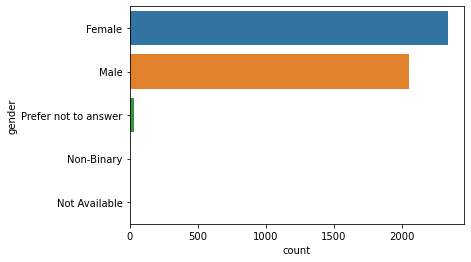

In [37]:
sns.countplot(y="gender", data=df)

<AxesSubplot:xlabel='count', ylabel='geography'>

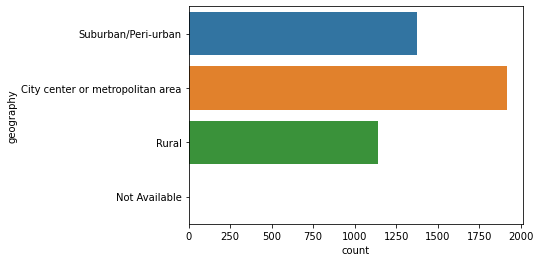

In [38]:
sns.countplot(y="geography",data=df)

<AxesSubplot:xlabel='count', ylabel='do_children_3_and_17_yrs_receive_regular_school_meals'>

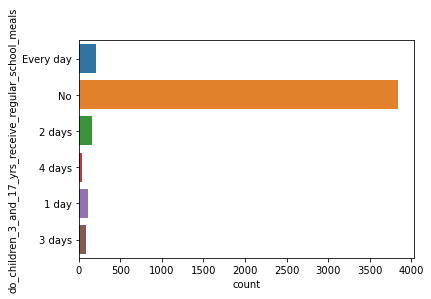

In [39]:
sns.countplot(y="do_children_3_and_17_yrs_receive_regular_school_meals",data=df)

In [40]:
df['education'].value_counts()

University or college degree completed               1327
Secondary school/ high school completed              1089
Technical school diploma or degree completed          580
Some university or college                            379
Some technical education (e.g polytechnic school)     322
Some secondary school / high school                   279
Post-graduate education                               241
Primary school completed                               98
Prefer not to answer                                   58
Some primary education                                 36
No formal education                                    20
College or university                                   3
Not available                                           1
Post graduate                                           1
Technical school                                        1
Secondary/high school                                   1
Name: education, dtype: int64

<AxesSubplot:xlabel='count', ylabel='do_children_3_to_17_yrs_miss_virtual_class_due_to_lack_of_electricity'>

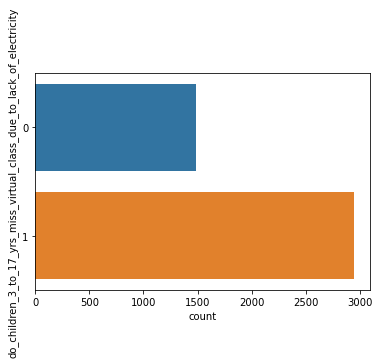

In [41]:
sns.countplot(y="do_children_3_to_17_yrs_miss_virtual_class_due_to_lack_of_electricity",data=df)

<AxesSubplot:xlabel='count', ylabel='do_children_3_to_17_yrs_miss_virtual_class_due_to_lack_of_electricity'>

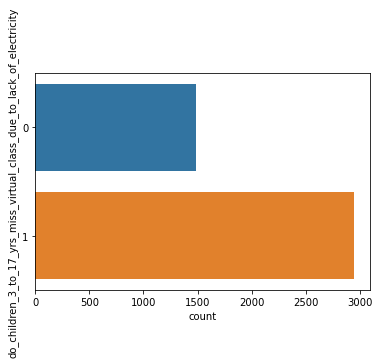

In [43]:
sns.countplot(y="do_children_3_to_17_yrs_miss_virtual_class_due_to_lack_of_electricity",data=df)